# Data Visualization for Cleaned Data without StopWords

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
import seaborn as sns
import numpy as np

import nltk.tokenize
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

C:\Users\Kajal\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



# Load the Dataset

In [2]:
f = r'C:\Users\Kajal\Desktop\Projects\Fake_News\Fake-News-Detection-System\Data Pre-processing\Cleaned_Data.csv'
Cleaned_Df = pd.read_csv(f)
Cleaned_Df.head()

,title,text,label,Processed_Content,Processed_Title
0,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"['daniel', 'greenfield,', 'a', 'shillman', 'jo...","['you', 'can', 'smell', 'hillary', 'fear']"
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"['google', 'pinterest', 'dig', 'linkedin', 're...","['watch', 'the', 'exact', 'moment', 'paul', 'r..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"['u.s.', 'secretary', 'of', 'state', 'john', '...","['kerry', 'to', 'go', 'to', 'paris', 'in', 'ge..."
3,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,"['a', 'kaydee', 'king', '(', 'kaydeeking)', 'n...","['bernie', 'supporters', 'on', 'twitter', 'eru..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"['it', 'be', 'primary', 'day', 'in', 'new', 'y...","['the', 'battle', 'of', 'new', 'york:', 'why',..."


# Check for duplicate rows in a Dataframe

In [3]:
# Check for Duplicate rows in whole DataFrame.
duplicate = Cleaned_Df[Cleaned_Df.duplicated()] 
print("Duplicate rows in the Dataframe:") # There are few duplicates in my dataset.
duplicate

Duplicate rows in the Dataframe:


,title,text,label,Processed_Content,Processed_Title
1492,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,REAL,"['to', 'watch', 'the', 'video', 'of', 'photogr...","['university', 'of', 'missouri,', 'please', 'i..."
1954,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,REAL,"['washington', '(cnn)', 'rosetta', 'lynch', 'b...","['rosetta', 'lynch', 'become', 'first', 'afric..."
2336,Obamacare Enrollees Anxiously Await Supreme Co...,"âIâve got my six-month, regular cancer che...",REAL,"['have', 'get', 'my', 'six', 'month,', 'regula...","['obamacare', 'enrol', 'anxious', 'await', 'su..."
2856,Donald Trump is blatantly racist â and the m...,"Donald Trump, the actual Republican candidate ...",REAL,"['donald', 'trump,', 'the', 'actual', 'republi...","['donald', 'trump', 'be', 'blatantly', 'racist..."
2952,"Black Agenda Report for Week of Oct 31, 2016","News, information and analysis from the black ...",FAKE,"['news,', 'information', 'and', 'analysis', 'f...","['black', 'agenda', 'report', 'for', 'week', '..."
3081,The College Loan Bombshell Hidden in the Budget,In obscure data tables buried deep in its 2016...,REAL,"['in', 'obscure', 'data', 'table', 'bury', 'de...","['the', 'college', 'loan', 'bombshell', 'hide'..."
3292,This astonishing chart shows how moderate Repu...,Political scientists have known for years that...,REAL,"['political', 'scientists', 'have', 'know', 'f...","['this', 'astonish', 'chart', 'show', 'how', '..."
3301,OnPolitics | 's politics blog,Who has Trump appointed to his cabinet so far?...,REAL,"['who', 'have', 'trump', 'appoint', 'to', 'his...","['politics', ""'s"", 'politics', 'blog']"
3324,Senate GOP prepared to replace Obamacare subsi...,"Killing Obama administration rules, dismantlin...",REAL,"['kill', 'obama', 'administration', 'rules,', ...","['senate', 'gop', 'prepare', 'to', 'replace', ..."
4140,We Republicans Lost On Gay Rights. Thatâs A ...,Iâm not among those Republicans who have â...,REAL,"['iam', 'not', 'among', 'those', 'republicans'...","['we', 'republicans', 'lose', 'on', 'gay', 'ri..."


In [4]:
# dropping duplicate values 
print("Before removing duplicates, length of data :",len(Cleaned_Df))
Cleaned_Df.drop_duplicates(keep=False,inplace=True) 
print("After dropping duplicate values, length of data :", len(Cleaned_Df))

Before removing duplicates, length of data : 6335
After dropping duplicate values, length of data : 6278


# Check missing values for each column

In [5]:
#Check missing values for each column
Cleaned_Df.isnull().sum().sort_values(ascending=False)  # No missing values in my data.

Processed_Title      0
Processed_Content    0
label                0
text                 0
title                0
dtype: int64

In [6]:
# Removing the title (we will only use the text)
Cleaned_Df.drop(['title'],axis=1,inplace=True)
Cleaned_Df.head()

,text,label,Processed_Content,Processed_Title
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"['daniel', 'greenfield,', 'a', 'shillman', 'jo...","['you', 'can', 'smell', 'hillary', 'fear']"
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"['google', 'pinterest', 'dig', 'linkedin', 're...","['watch', 'the', 'exact', 'moment', 'paul', 'r..."
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,"['u.s.', 'secretary', 'of', 'state', 'john', '...","['kerry', 'to', 'go', 'to', 'paris', 'in', 'ge..."
3,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,"['a', 'kaydee', 'king', '(', 'kaydeeking)', 'n...","['bernie', 'supporters', 'on', 'twitter', 'eru..."
4,It's primary day in New York and front-runners...,REAL,"['it', 'be', 'primary', 'day', 'in', 'new', 'y...","['the', 'battle', 'of', 'new', 'york:', 'why',..."


## Basic Data Exploration

### How many articles per Label?

label
FAKE    3140
REAL    3138
Name: text, dtype: int64


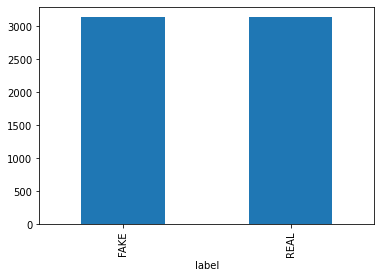

In [7]:
# How many articles per label?
print(Cleaned_Df.groupby(['label'])['text'].count())
Cleaned_Df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show() # Pretty equal amount of articles to each label.

### Word cloud for Fake News

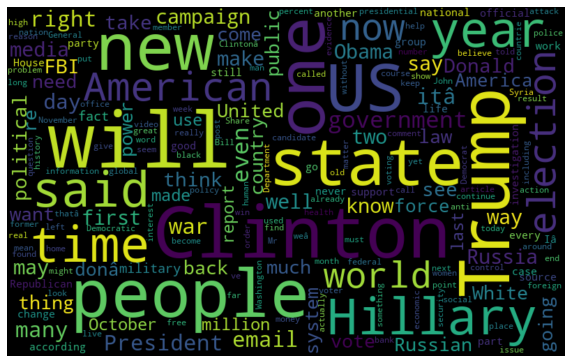

In [8]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = Cleaned_Df[Cleaned_Df["label"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for Real News

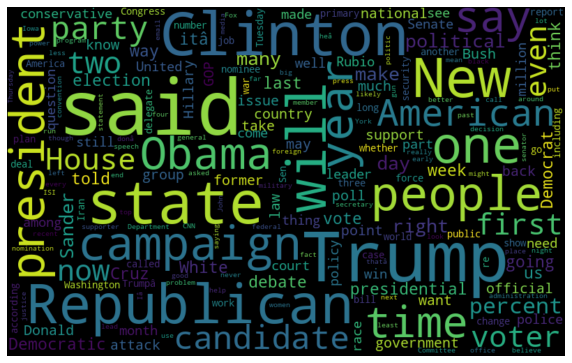

In [9]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = Cleaned_Df[Cleaned_Df["label"] == "REAL"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Frequent Words Counter

In [10]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

### Frequent word counters in Fake News

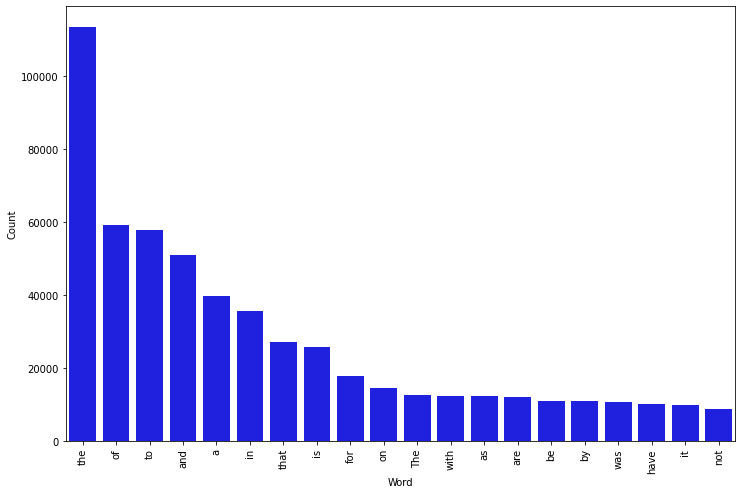

In [11]:
# Most frequent words in fake news
counter(Cleaned_Df[Cleaned_Df["label"] == "FAKE"], "text", 20)

### Frequent Word Counters in Real News

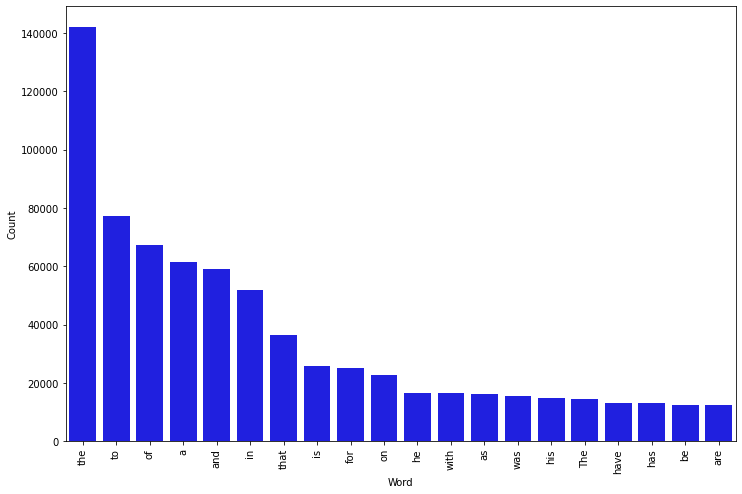

In [12]:
# Most frequent words in fake news
counter(Cleaned_Df[Cleaned_Df["label"] == "REAL"], "text", 20)

## Summary:
- You see!! How it is showing most occurring, not much weighted key-terms in the visualization. So, that's why it is adviced to clean stopwords as well.
- But if your data is not having any labels and you are trying to generate n_Grams, topic modelling, grammar patterns in order to label your data. Do keep the Stopwords, these will gonna help you in proper labeling.
- Indeed, Without stopwords file is giving us good sense of important key-terms in our data corresponding to each Label. Do check it other file of visualization if you didn't see it already.
